In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [19]:
raw_data_dir = 'main/data_raw'

In [20]:
train_data_fnames = [f'{raw_data_dir}/{i}' for i in os.listdir(raw_data_dir) if '2012' in i]
test_data_fnames = [f'{raw_data_dir}/{i}' for i in os.listdir(raw_data_dir) if '2020' in i]

train_data = [(i[i.rindex('/')+1:], pd.read_csv(i)) for i in train_data_fnames]

In [31]:
mark_data = [(i[0], i[1].copy()) for i in train_data]

for i, df in enumerate(mark_data):
	df[1]['TICK'] = df[1].shape[0]*[df[0][:df[0].index('_')]]
	mark_data[i] = df[1].copy()

combined_train_data = pd.concat(mark_data)

combined_train_data.sample(10)

,Timestamp,Open,High,Low,Close,Volume,TICK
528,2014-02-10,361.609985,365.000000,359.350006,360.869995,3449700.0,AMZN
125,2012-07-02,291.201202,291.791779,288.538544,290.525513,3307600.0,GOOGL
227,2012-11-28,334.339325,342.797791,332.277283,342.177185,6077900.0,GOOGL
1054,2016-04-19,2886.000000,2934.000000,2863.000000,2832.875000,11913400.0,6758.T
1042,2016-02-25,31.940001,32.080002,31.760000,28.456766,12894300.0,EZU
1133,2016-08-12,5.780000,5.780000,5.660000,4.606840,532975264.0,0939.HK
216,2012-11-02,27.100000,27.309999,27.030001,16.664791,4605014.0,RDSA.AS
609,2014-06-06,52.389999,52.599998,52.290001,36.763912,893200.0,HSBC
686,2014-09-25,99.519997,99.650002,97.699997,92.562065,68642500.0,QQQ
10,2012-01-18,36.799999,37.119999,36.799999,32.395153,3750600.0,EWJ


In [42]:
# Timestamp is currently object. Needs to be datetime

filter_train_data = combined_train_data.copy()[['TICK', 'Timestamp', 'Close']]

filter_train_data.Timestamp = pd.to_datetime(pd.Series(filter_train_data.Timestamp), format='%Y-%m-%d')

filter_train_data.sample(10)

,TICK,Timestamp,Close
393,EZU,2013-07-29,29.677420
970,2503.T,2015-12-15,1517.528564
1417,EWJ,2017-08-21,51.634972
1274,PTR,2017-01-26,67.175514
19,SIE.DE,2012-01-27,53.544876
46,TWTR,2014-01-15,61.570000
694,EZU,2014-10-07,31.770666
699,0939.HK,2014-11-07,4.117017
1304,GOOGL,2017-03-10,861.409973
707,KO,2014-10-24,33.737095


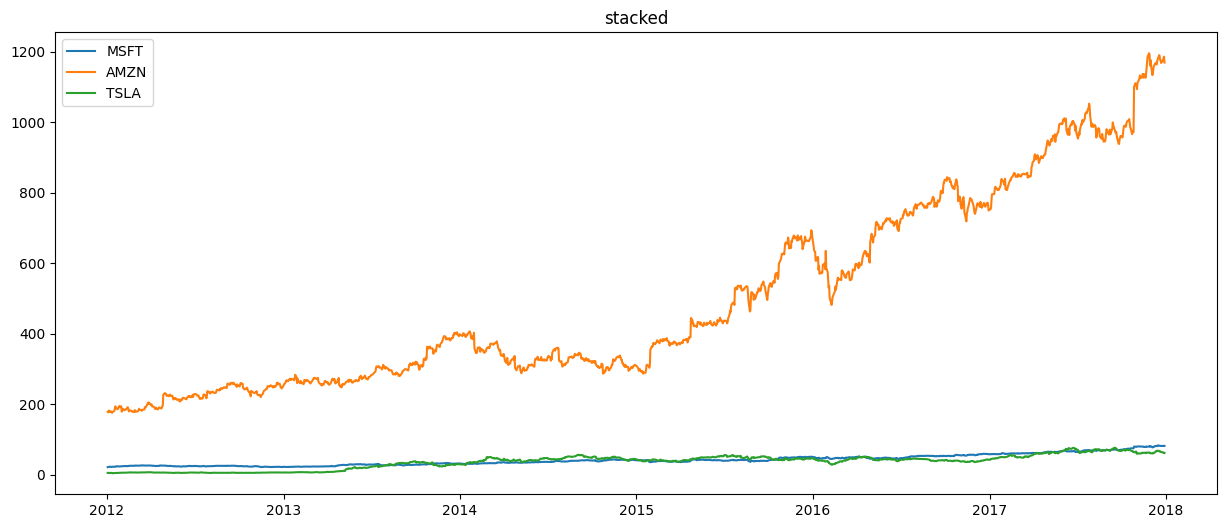

In [44]:
vis_df = filter_train_data.copy()


plt.figure(figsize = (15,6))
x_range = np.arange(1509)
for tick in ('MSFT', 'AMZN', 'TSLA'):
	plt.plot(vis_df[vis_df.TICK == tick].sort_values('Timestamp').Timestamp, vis_df[vis_df.TICK == tick].sort_values('Timestamp').Close, label = tick)
plt.legend()
plt.title('stacked')
plt.show()